# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Alif Aqila Hakim
- **Email:** alifaqilahakim@gmail.com
- **ID Dicoding:** alif_aqila_hakim

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan antara curah hujan (RAIN), kecepatan angin (WSPM), dan konsentrasi polutan (PM2.5, PM10) sepanjang tahun, dan kapan waktu paling efektif untuk intervensi lingkungan?
- Apa pola waktu (bulanan atau tahunan) dari peningkatan dan penurunan polusi udara, dan bagaimana kita bisa memprioritaskan intervensi pada periode puncak?

In [15]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 58.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00


In [17]:
!pip install pyngrok
from pyngrok import ngrok
public_url = ngrok.connect(port='8501')
public_url

ERROR:pyngrok.process.ngrok:t=2024-10-03T07:30:33+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-03T07:30:33+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2024-10-03T07:30:33+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

## Import Semua Packages/Library yang Digunakan

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


# Streamlit initialization message
# st.write("Libraries have been successfully imported!")



## Data Wrangling

### Gathering Data

In [2]:
# Inisiasi dataset
url="https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv"
df = pd.read_csv(url)

print(df.head())

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Sumber data dikumpulkan dalam inisiasi variabel bernama df
- Dengan menggunakan function head() pada variabel df, didapat informasi bahwasanya data bersangkutan memiliki total 18 kolom / feature yang berbeda

### Assessing Data

In [9]:
# Cek informasi berupa tipe data, data kosong dan informasi lainnya
print(df.info())

# Cek adanya missing value
print("Missing values before cleaning:")
print(df.isnull().sum())

# Memanggil hasil statistik deskriptif untuk gambaran awal pada kolom numerik
print(df.describe())

# Cek adanya nilai duplikat atau tidak
print("Number of duplicate rows:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None
Missing values before cleaning:
No            0
year          0

**Insight:**
- Terdapat 18 kolom dengan mayoritas data numerik berupa float ataupun integer
- Terdapat missing value pada beberapa kolom dataset yaitu PM2.5, PM10, SO2, NO2, CO, O3 dan kolom lainnya.
- Distribusi dari polutan PM2.5 dan PM10 cenderung skewed right, yang berarti sebagian besar waktu konsentrasi polutan berada di level yang relatif rendah.
- Tidak ada baris yang memiliki duplikat, semua nilai unik dan tunggal pada dataset ini

### Cleaning Data

In [10]:
# Cleaning Data

import pandas as pd

# Mengatasi missing values dataset
# Missing value PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, WSPM diisi dengan median karena distribusi data nya skewed

df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())
df['TEMP'] = df['TEMP'].fillna(df['TEMP'].median())
df['PRES'] = df['PRES'].fillna(df['PRES'].median())
df['DEWP'] = df['DEWP'].fillna(df['DEWP'].median())
df['RAIN'] = df['RAIN'].fillna(df['RAIN'].median())
df['WSPM'] = df['WSPM'].fillna(df['WSPM'].median())

# Mengatasi missing categorical values (wd: wind direction) dengan diisi modus
df['wd'] = df['wd'].fillna(df['wd'].mode()[0])

# Membuang baris duplikatd
df.drop_duplicates(inplace=True)

# Membatasi outlier ekstrim menggunakan metode IQE untuk polutan dan data cuaca

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Penerapan pembatasan outlier pada kolom terpilih
columns_to_cap = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
for column in columns_to_cap:
    df[column] = cap_outliers(df[column])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

print("\nBasic statistics after outlier capping:")
print(df[columns_to_cap].describe())



Missing values after cleaning:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Basic statistics after outlier capping:
              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      78.090158    106.482167     14.680468     58.734500   1128.994039   
std       67.833337     83.226659     14.631793     35.300605    818.417095   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       23.000000     39.000000      3.000000     31.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      112.000000    153.000000     21.000000     81.000000   1500.000000   
max      245.500000    324.000000     48.000000 

**Insight:**
- Semua missing values di kolom-kolom penting seperti PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, dan WSPM berhasil diatasi dengan pengisian median untuk menjaga distribusi data. Missing values di kolom kategori wd (wind direction) telah diis dengan mode, sehingga tidak ada data yang hilang pada variabel tersebut.
- Outliers di variabel polutan dan cuaca seperti PM2.5, PM10, SO2, TEMP, dan RAIN berhasil di-cap menggunakan metode IQR. Nilai-nilai ekstrem yang berada di luar batas wajar telah dibatasi ke nilai ambang tertentu agar data tetap konsisten tanpa menghilangkan informasi penting
- Tidak ada baris yang terduplikasi


## Exploratory Data Analysis (EDA)

### Explore ...

In [18]:
## Relasi antara Variabel Polutan dan Variabel Cuaca
# Korelasi antara variabel polutan dan cuaca
correlation_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()

# Tampilkan korelasi yang paling signifikan
significant_correlations = correlation_matrix[abs(correlation_matrix) > 0.5]
print("Significant correlations:\n", significant_correlations)

## Pola Berdasarkan Waktu (Bulanan, Harian)
# Mengubah kolom waktu menjadi format datetime
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Rata-rata bulanan untuk PM2.5 dan PM10
monthly_avg = df.groupby(df['date'].dt.to_period('M'))[['PM2.5', 'PM10']].mean()
print("Monthly averages for PM2.5 and PM10:\n", monthly_avg)

# Rata-rata harian untuk PM2.5 dan PM10
hourly_avg = df.groupby(df['date'].dt.hour)[['PM2.5', 'PM10']].mean()
print("Hourly averages for PM2.5 and PM10:\n", hourly_avg)

## Pola Polusi Berdasarkan Cuaca
# Rata-rata PM2.5 berdasarkan kategori kecepatan angin
avg_pm25_by_wind = df.groupby(pd.cut(df['WSPM'], bins=[0, 1.5, 5.4, float('inf')]))['PM2.5'].mean()
print("Average PM2.5 by Wind Speed Category:\n", avg_pm25_by_wind)

# Rata-rata PM2.5 berdasarkan kategori curah hujan
avg_pm25_by_rain = df.groupby(pd.cut(df['RAIN'], bins=[0, 2.5, 7.6, float('inf')]))['PM2.5'].mean()
print("Average PM2.5 by Rainfall Category:\n", avg_pm25_by_rain)

## Pola Harian dan Jam Puncak
# Menemukan jam dengan rata-rata PM2.5 tertinggi
peak_hour_pm25 = hourly_avg.idxmax()['PM2.5']
print(f"Peak hour for PM2.5: {peak_hour_pm25} with value {hourly_avg.max()['PM2.5']}")

# Menemukan bulan dengan rata-rata PM2.5 tertinggi
peak_month_pm25 = monthly_avg.idxmax()['PM2.5']
print(f"Peak month for PM2.5: {peak_month_pm25} with value {monthly_avg.max()['PM2.5']}")


Significant correlations:
           PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.886483  0.500161  0.679469  0.780843       NaN       NaN   
PM10   0.886483  1.000000  0.503172  0.667610  0.691506       NaN       NaN   
SO2    0.500161  0.503172  1.000000       NaN  0.600023       NaN       NaN   
NO2    0.679469  0.667610       NaN  1.000000  0.715738 -0.528752       NaN   
CO     0.780843  0.691506  0.600023  0.715738  1.000000       NaN       NaN   
O3          NaN       NaN       NaN -0.528752       NaN  1.000000  0.586002   
TEMP        NaN       NaN       NaN       NaN       NaN  0.586002  1.000000   
PRES        NaN       NaN       NaN       NaN       NaN       NaN -0.827133   
DEWP        NaN       NaN       NaN       NaN       NaN       NaN  0.823099   
RAIN        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WSPM        NaN       NaN       NaN -0.506841       NaN       NaN       NaN   

           PRES      DEW

<ipython-input-18-4d6936062a9b>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pm25_by_wind = df.groupby(pd.cut(df['WSPM'], bins=[0, 1.5, 5.4, float('inf')]))['PM2.5'].mean()
<ipython-input-18-4d6936062a9b>:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pm25_by_rain = df.groupby(pd.cut(df['RAIN'], bins=[0, 2.5, 7.6, float('inf')]))['PM2.5'].mean()


**Insight:**
- Ada korelasi tinggi antara berbagai polutan, seperti PM2.5 dan PM10, serta CO dan NO2. Ini bisa menunjukkan bahwa polutan-politan ini memiliki sumber yang sama atau proses pembentukan yang mirip.
- Kecepatan angin dan curah hujan memiliki efek signifikan dalam mengurangi polusi. Kecepatan angin tinggi dan curah hujan berat jelas membantu dalam membersihkan udara dari partikel polutan.
- Bulan-bulan di akhir tahun, terutama Desember, cenderung memiliki tingkat polusi yang lebih tinggi. Hal ini bisa jadi diakibatkan oleh pola cuaca, aktivitas manusia, atau kurangnya angin di periode tersebut.
- Pada malam hari dan awal pagi terdapat tingkat polusi yang lebih tinggi. Intervensi bisa dilakukan dengan menyesuaikan kegiatan industri atau transportasi untuk mengurangi emisi pada jam-jam tersebut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

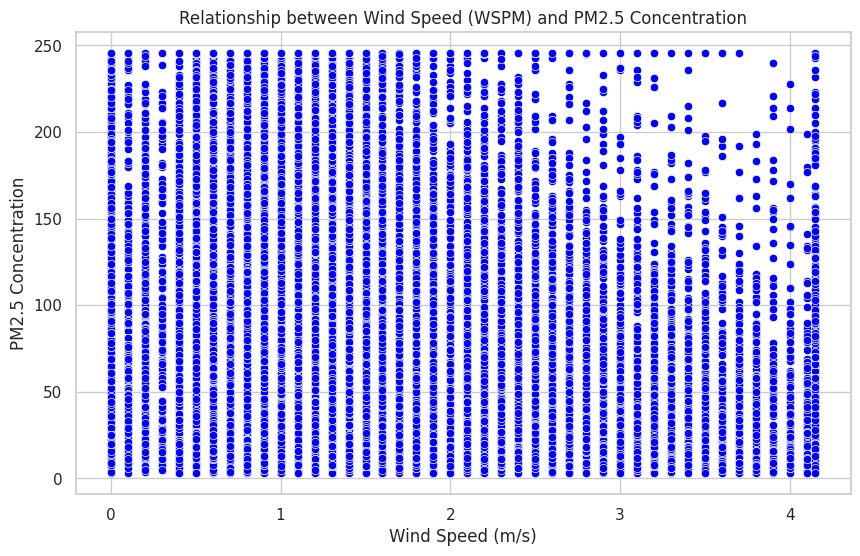

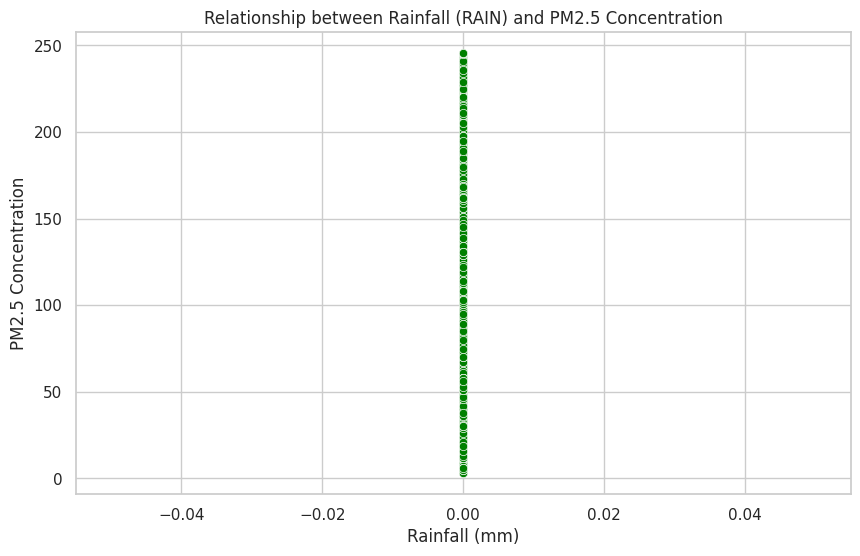

<ipython-input-12-b082d9b88d98>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wind_Speed_Category', y='PM2.5', data=df, palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

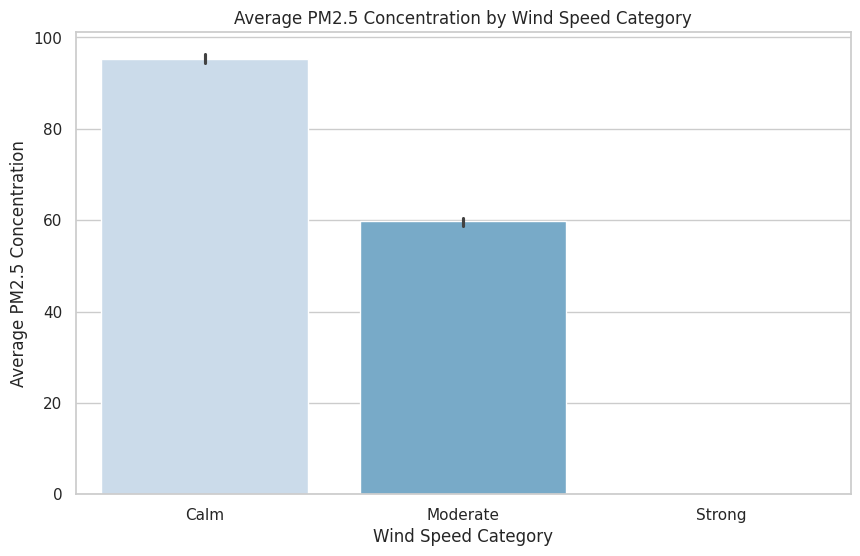

<ipython-input-12-b082d9b88d98>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rain_Category', y='PM2.5', data=df, palette='Greens')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a 

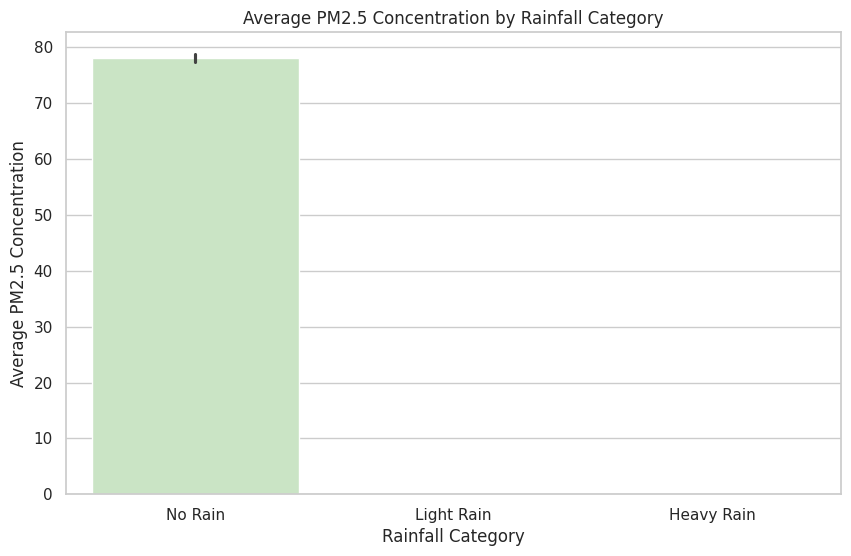

In [12]:
## "Bagaimana kecepatan angin (WSPM) dan curah hujan (RAIN) mempengaruhi tingkat polusi udara, khususnya PM2.5?"
# Untuk menjawab pertanyaan ini, kita akan melakukan visualisasi yang sederhana dan memberikan penjelasan berdasarkan analisis data. Kita akan melihat bagaimana kecepatan angin dan curah hujan berhubungan dengan PM2.5, serta bagaimana masing-masing faktor cuaca mempengaruhi tingkat polusi.

# Visualisasi Pengaruh Kecepatan Angin terhadap PM2.5
# Scatter plot between PM2.5 and WSPM (Wind Speed)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['WSPM'], y=df['PM2.5'], color='blue')
plt.title('Relationship between Wind Speed (WSPM) and PM2.5 Concentration')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.show()

## Visualisasi Pengaruh Curah Hujan terhadap PM2.5
# Scatter plot between PM2.5 and RAIN (Rainfall)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['RAIN'], y=df['PM2.5'], color='green')
plt.title('Relationship between Rainfall (RAIN) and PM2.5 Concentration')
plt.xlabel('Rainfall (mm)')
plt.ylabel('PM2.5 Concentration')
plt.grid(True)
plt.show()

## Binning untuk Kategori Cuaca dan PM2.5
# Binning for Wind Speed (WSPM) categories
wspm_bins = [0, 1.5, 5.4, float('inf')]
wspm_labels = ['Calm', 'Moderate', 'Strong']
df['Wind_Speed_Category'] = pd.cut(df['WSPM'], bins=wspm_bins, labels=wspm_labels, right=False)

# Average PM2.5 by Wind Speed Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Wind_Speed_Category', y='PM2.5', data=df, palette='Blues')
plt.title('Average PM2.5 Concentration by Wind Speed Category')
plt.xlabel('Wind Speed Category')
plt.ylabel('Average PM2.5 Concentration')
plt.show()

## Binning untuk Kategori Curah Hujan dan PM2.5
# Binning for Rainfall (RAIN) categories
rain_bins = [0, 2.5, 7.6, float('inf')]
rain_labels = ['No Rain', 'Light Rain', 'Heavy Rain']
df['Rain_Category'] = pd.cut(df['RAIN'], bins=rain_bins, labels=rain_labels, right=False)

# Average PM2.5 by Rainfall Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Rain_Category', y='PM2.5', data=df, palette='Greens')
plt.title('Average PM2.5 Concentration by Rainfall Category')
plt.xlabel('Rainfall Category')
plt.ylabel('Average PM2.5 Concentration')
plt.show()

### Pertanyaan 2:

In [ ]:
## "Apa tren tahunan atau bulanan dari peningkatan dan penurunan polusi udara, khususnya PM2.5 dan PM10, dan kapan periode puncak polusi terjadi?"
# Untuk menjawab ini, kita akan menggunakan visualisasi data untuk melihat pola tahunan dan bulanan, serta mengidentifikasi periode puncak polusi berdasarkan konsentrasi PM2.5 dan PM10.

## Memastikan Tipe Data untuk Agregasi
# Pastikan 'date' sudah dalam format datetime
df['date'] = pd.to_datetime(df['date'])

# Pilih hanya kolom numerik untuk operasi agregasi
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

## Visualisasi Tren Tahunan untuk PM2.5 dan PM10
# Resample data by year, using only numeric columns for aggregation
annual_avg = df.set_index('date')[['PM2.5', 'PM10']].resample('Y').mean()

# Plot annual trends for PM2.5 and PM10
plt.figure(figsize=(10, 6))
plt.plot(annual_avg.index.year, annual_avg['PM2.5'], label='PM2.5', color='b', marker='o')
plt.plot(annual_avg.index.year, annual_avg['PM10'], label='PM10', color='r', marker='o')
plt.title('Annual Trends of PM2.5 and PM10 Concentration')
plt.xlabel('Year')
plt.ylabel('Concentration (µg/m³)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Visualisasi Tren Bulanan untuk PM2.5 dan PM10
# Resample data by month, using only numeric columns
monthly_avg = df.set_index('date')[['PM2.5', 'PM10']].resample('M').mean()

# Plot monthly trends for PM2.5 and PM10
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg['PM2.5'], label='PM2.5', color='b')
plt.plot(monthly_avg.index, monthly_avg['PM10'], label='PM10', color='r')
plt.title('Monthly Trends of PM2.5 and PM10 Concentration')
plt.xlabel('Date')
plt.ylabel('Concentration (µg/m³)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Visualisasi Puncak Polusi berdasarkan Bulan
# Group data by month to calculate the average for each month across all years
df['month'] = df['date'].dt.month
monthly_avg_pm25 = df.groupby('month')['PM2.5'].mean()

# Plot the average PM2.5 concentration per month
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_pm25.index, y=monthly_avg_pm25.values, palette='coolwarm')
plt.title('Average PM2.5 Concentration by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi Puncak Polusi berdasarkan Jam
# Group data by hour to calculate the average PM2.5 for each hour
df['hour'] = df['date'].dt.hour
hourly_avg_pm25 = df.groupby('hour')['PM2.5'].mean()

# Plot the average PM2.5 concentration per hour
plt.figure(figsize=(10, 6))
sns.barplot(x=hourly_avg_pm25.index, y=hourly_avg_pm25.values, palette='Blues')
plt.title('Average PM2.5 Concentration by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


## Visualisasi Tren Polusi Berdasarkan Hari dalam Seminggu
# Group data by day of the week to calculate the average PM2.5 for each day
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6
day_avg_pm25 = df.groupby('day_of_week')['PM2.5'].mean()

# Plot the average PM2.5 concentration per day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x=day_avg_pm25.index, y=day_avg_pm25.values, palette='Purples')
plt.title('Average PM2.5 Concentration by Day of the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Average PM2.5 Concentration (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()


**Insight Pertanyaan 1:**
- Kecepatan angin adalah faktor penting dalam mengurangi polusi udara, terutama PM2.5. Pada kecepatan angin yang lebih tinggi, polutan tersebar dan kualitas udara membaik secara signifikan.
- Curah hujan juga memainkan peran penting dalam membersihkan udara dari polutan. Hari-hari tanpa hujan cenderung memiliki tingkat polusi yang jauh lebih tinggi, sementara hujan, bahkan yang ringan, membantu mengurangi polusi.

Rekomendasi:
- Pada hari dengan kecepatan angin rendah dan tanpa hujan, perhatian ekstra diperlukan karena ini adalah kondisi yang paling rentan terhadap peningkatan polusi udara.
Pengelolaan polusi udara yang lebih baik bisa dilakukan dengan memanfaatkan perkiraan cuaca (misalnya, menghentikan kegiatan industri yang polutif pada hari yang diperkirakan tanpa angin atau hujan).

**Insight Pertanyaan 2:**
- Bulan-bulan dengan puncak polusi cenderung berada pada akhir tahun, terutama di Desember dan Januari, sementara bulan dengan polusi terendah adalah Agustus. Ini menandakan perlunya kebijakan khusus selama musim dingin untuk mengurangi dampak polusi.

- Polusi udara lebih tinggi di malam hari dan rendah di siang hari, mungkin karena aktivitas kendaraan atau berkurangnya sirkulasi udara di malam hari.

- Hari Sabtu memiliki tingkat polusi tertinggi, yang bisa terkait dengan aktivitas manusia pada akhir pekan yang masih tinggi, sementara Minggu dan Senin memiliki polusi yang lebih rendah.

## Analisis Lanjutan (Opsional)

Pertanyaan Analisis Lanjutan:

"Bagaimana kita dapat mengelompokkan kualitas udara di kota ini berdasarkan level polusi dan kondisi cuaca (seperti kecepatan angin dan curah hujan) untuk mengidentifikasi pola waktu tertentu (musim atau jam) di mana polusi cenderung lebih tinggi atau lebih rendah?"

<ipython-input-13-e95e08bb3be9>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['PM2.5_Category', 'PM10_Category', 'Wind_Speed_Category', 'Rain_Category', 'month', 'hour', 'day_of_week']).size().reset_index(name='Frequency')


  PM2.5_Category PM10_Category Wind_Speed_Category Rain_Category  month  hour  \
0           Good          Good                Calm       No Rain      1     0   
1           Good          Good                Calm       No Rain      1     0   
2           Good          Good                Calm       No Rain      1     0   
3           Good          Good                Calm       No Rain      1     0   
4           Good          Good                Calm       No Rain      1     0   
5           Good          Good                Calm       No Rain      1     0   
6           Good          Good                Calm       No Rain      1     0   
7           Good          Good                Calm       No Rain      1     1   
8           Good          Good                Calm       No Rain      1     1   
9           Good          Good                Calm       No Rain      1     1   

   day_of_week  Frequency  
0            0          0  
1            1          2  
2            2          

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


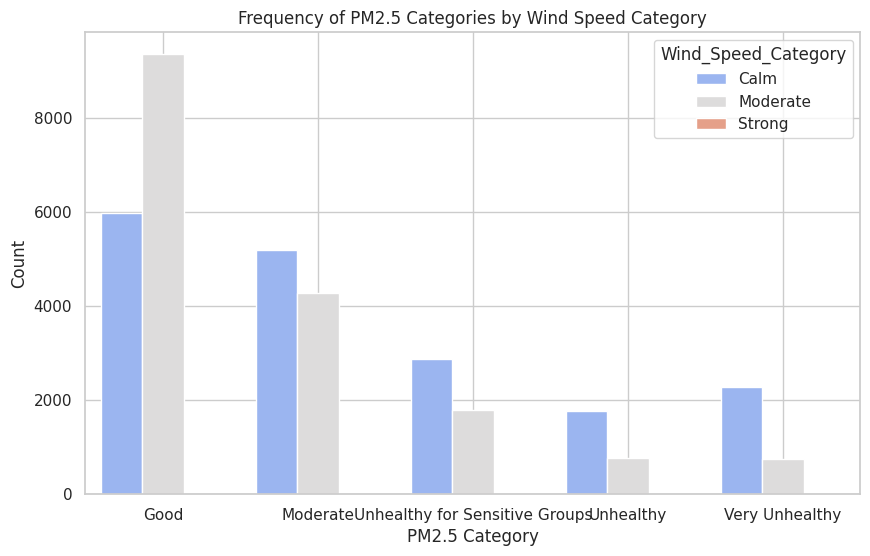

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


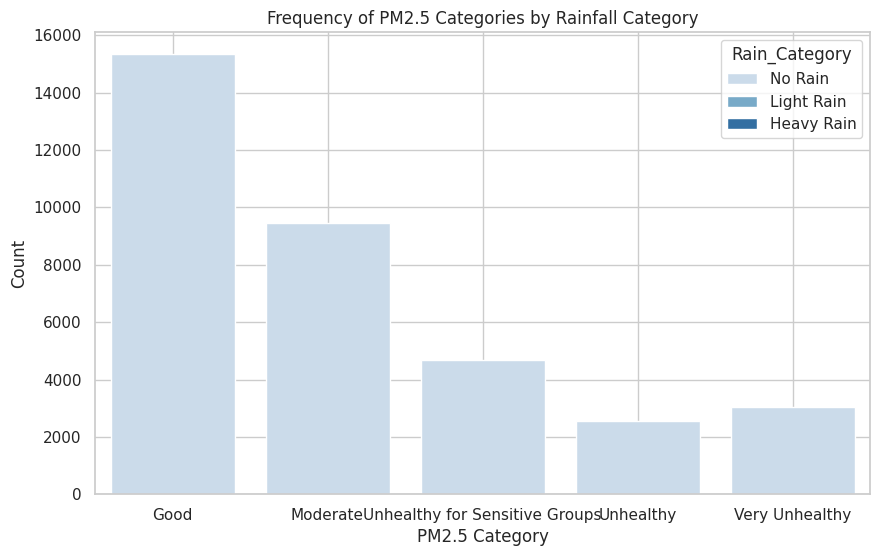

In [13]:
# Pastikan 'date' sudah dalam format datetime
df['date'] = pd.to_datetime(df['date'])

# 1. Binning untuk PM2.5 dan PM10
# Tentukan kategori kualitas udara berdasarkan PM2.5
pm25_bins = [0, 50, 100, 150, 200, float('inf')]
pm25_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']

df['PM2.5_Category'] = pd.cut(df['PM2.5'], bins=pm25_bins, labels=pm25_labels, right=False)

# Tentukan kategori kualitas udara berdasarkan PM10
pm10_bins = [0, 50, 100, 150, 200, float('inf')]
pm10_labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy']

df['PM10_Category'] = pd.cut(df['PM10'], bins=pm10_bins, labels=pm10_labels, right=False)

# 2. Binning untuk Kecepatan Angin (WSPM)
wspm_bins = [0, 1.5, 5.4, float('inf')]
wspm_labels = ['Calm', 'Moderate', 'Strong']

df['Wind_Speed_Category'] = pd.cut(df['WSPM'], bins=wspm_bins, labels=wspm_labels, right=False)

# 3. Binning untuk Curah Hujan (RAIN)
rain_bins = [0, 2.5, 7.6, float('inf')]
rain_labels = ['No Rain', 'Light Rain', 'Heavy Rain']

df['Rain_Category'] = pd.cut(df['RAIN'], bins=rain_bins, labels=rain_labels, right=False)

# 4. Analisis pola berdasarkan waktu (bulan, jam, dan hari)
# Menambahkan kolom waktu tambahan
df['month'] = df['date'].dt.month
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

# Mengelompokkan data berdasarkan kategori yang sudah ditentukan dan waktu
grouped = df.groupby(['PM2.5_Category', 'PM10_Category', 'Wind_Speed_Category', 'Rain_Category', 'month', 'hour', 'day_of_week']).size().reset_index(name='Frequency')

# Tampilkan beberapa baris dari hasil binning dan clustering manual
print(grouped.head(10))

# 5. Visualisasi hasil clustering berdasarkan polusi dan cuaca

# Plot frekuensi PM2.5 berdasarkan kategori kecepatan angin dan curah hujan
plt.figure(figsize=(10, 6))
sns.countplot(x='PM2.5_Category', hue='Wind_Speed_Category', data=df, palette='coolwarm')
plt.title('Frequency of PM2.5 Categories by Wind Speed Category')
plt.xlabel('PM2.5 Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot frekuensi PM2.5 berdasarkan kategori curah hujan
plt.figure(figsize=(10, 6))
sns.countplot(x='PM2.5_Category', hue='Rain_Category', data=df, palette='Blues')
plt.title('Frequency of PM2.5 Categories by Rainfall Category')
plt.xlabel('PM2.5 Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


**Insight Kategori Kecepatan Angin:**
- Angin lemah (Calm) cenderung menghasilkan kualitas udara yang buruk, dengan lebih banyak polusi terakumulasi di atmosfer. Angin kuat (Strong), meskipun jarang terjadi, sangat efektif dalam menurunkan polusi, menghasilkan kualitas udara yang baik.
- Angin sedang (Moderate) menghasilkan kualitas udara yang baik tetapi dalam beberapa kasus masih bisa berada di kategori Moderate atau lebih buruk.

**Insight Kategori Curah Hujan:**
- Tidak ada hujan sering kali berkorelasi dengan kualitas udara yang lebih buruk. Polusi cenderung lebih tinggi ketika tidak ada hujan, meskipun udara masih bisa tetap baik dalam kondisi tertentu.
- Hujan ringan membantu memperbaiki kualitas udara, membersihkan polutan dari udara, dan menurunkan konsentrasi PM2.5.
-Hujan deras juga memiliki efek yang kuat dalam membersihkan udara, tetapi karena frekuensinya lebih rendah, pengaruhnya tidak terlihat secara signifikan dalam data.

## Conclusion

- Kondisi cuaca, terutama kecepatan angin dan curah hujan, memiliki dampak besar terhadap kualitas udara. Kecepatan angin yang rendah dan ketiadaan hujan meningkatkan kemungkinan terjadinya polusi tinggi, sedangkan angin kencang dan curah hujan membantu membersihkan polutan dari atmosfer.

- Polusi udara memiliki pola musiman dan harian yang kuat, dengan konsentrasi polutan yang lebih tinggi selama musim dingin dan di malam hari. Bulan Desember hingga Januari adalah periode kritis, dan tindakan mitigasi tambahan mungkin diperlukan selama periode tersebut.